In [775]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [776]:
# Importing the data set for xmlpi
df = pd.read_excel('XML PI transactions.xls', sheetname = 'Daily data', parse_cols =2)

In [777]:
df.columns

Index(['Date', 'Messages', 'Delta Since 1st July'], dtype='object')

In [778]:
df.head()

,Date,Messages,Delta Since 1st July
0,2010-07-01,303527.0,0.0
1,2010-07-02,296493.0,0.0
2,2010-07-03,270807.0,0.0
3,2010-07-04,257801.0,0.0
4,2010-07-05,356954.0,53427.0


In [779]:
len(df)

2830

In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
Date                    2830 non-null datetime64[ns]
Messages                2819 non-null float64
Delta Since 1st July    2825 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 66.4 KB


In [781]:
df.Date.tail()

2825   2018-03-27
2826   2018-03-28
2827   2018-03-29
2828   2018-03-30
2829   2018-03-31
Name: Date, dtype: datetime64[ns]

In [782]:
df[['Date', 'Messages']].head()

,Date,Messages
0,2010-07-01,303527.0
1,2010-07-02,296493.0
2,2010-07-03,270807.0
3,2010-07-04,257801.0
4,2010-07-05,356954.0


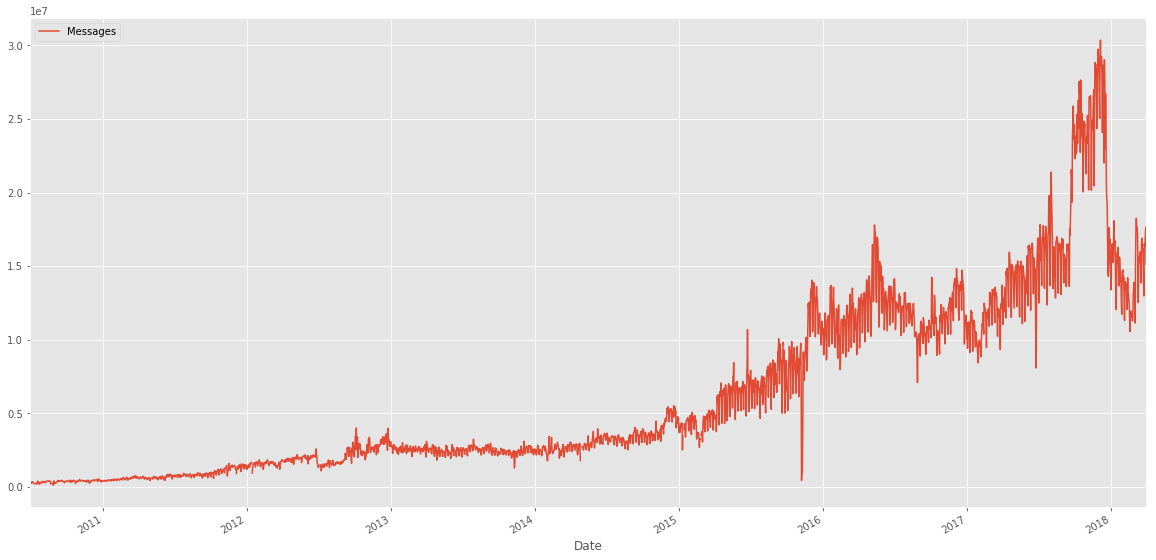

In [783]:
df[['Date', 'Messages']].plot(x = "Date", y = "Messages", kind= "line", figsize = (20,10))

In [784]:
df.drop('Delta Since 1st July', axis =1 , inplace=True)

In [785]:
df.shape

(2830, 2)

In [786]:
df.tail()

,Date,Messages
2825,2018-03-27,16340320.0
2826,2018-03-28,16379341.0
2827,2018-03-29,17166139.0
2828,2018-03-30,17645568.0
2829,2018-03-31,15121190.0


In [787]:
# Lets create a label
# For predcition 'n' number of days into the future - here we select n = 90
n = 90
df['label'] = df['Messages'].shift(-n)

In [788]:
df.tail(20)

,Date,Messages,label
2810,2018-03-12,15594496.0,NaN
2811,2018-03-13,15297032.0,NaN
2812,2018-03-14,15551558.0,NaN
2813,2018-03-15,15395735.0,NaN
2814,2018-03-16,15974493.0,NaN
2815,2018-03-17,15008961.0,NaN
2816,2018-03-18,13871439.0,NaN
2817,2018-03-19,16376852.0,NaN
2818,2018-03-20,16887208.0,NaN
2819,2018-03-21,16288386.0,NaN


In [789]:
df_copy = df.copy()

In [790]:
df_copy.tail(21)

,Date,Messages,label
2809,2018-03-11,12524549.0,NaN
2810,2018-03-12,15594496.0,NaN
2811,2018-03-13,15297032.0,NaN
2812,2018-03-14,15551558.0,NaN
2813,2018-03-15,15395735.0,NaN
2814,2018-03-16,15974493.0,NaN
2815,2018-03-17,15008961.0,NaN
2816,2018-03-18,13871439.0,NaN
2817,2018-03-19,16376852.0,NaN
2818,2018-03-20,16887208.0,NaN


In [791]:
df_copy.shape

(2830, 3)

In [792]:
df_copy.dropna(inplace=True)
df_copy.shape

(2718, 3)

In [793]:
df_copy.tail(5)

,Date,Messages,label
2735,2017-12-27,17613272.0,16340320.0
2736,2017-12-28,16449983.0,16379341.0
2737,2017-12-29,16840971.0,17166139.0
2738,2017-12-30,15256747.0,17645568.0
2739,2017-12-31,14359372.0,15121190.0


In [794]:
# Transaction volumes have been shifted up by 10 rows so label for each row corresponds to the volume 10 days
# into the future
# We will use this data to train and test our data

# Lets save our features , here its only the Messages into our independent variable X

# Remove the NaN values so that we don't have any NaN values in the df_copy.label

X = np.array(df_copy['Messages'])
y = np.array(df_copy['label'])[:-n]

print("length of X is:", len(X))
print("length of y is:", len(y))

# # Applying scaling on X
# #X = preprocessing.scale(X)

# #X = np.array(df['Messages'])
# print("Old length of X is:", len(X))
# Split X in train/test and predict
#X_predict = X[-10:]
print("length of X_predict is:", len(X_predict))

# # # Now the actual X is
#X = X[:-10]
print('Actual X shape: ', len(X))

# print("New length of X is:", len(X))

# # # drop the NaN values in the label as this will affect the prediction
# # df.dropna(inplace = True)
# # y = np.array(df['label'])

# print("New length of y is:", len(y))

# # print("length of X is:", len(X))
# # print("length of y is:", len(y))

# Need to reshape X and it otherwise generates an error. This is a single feature.
X = X.reshape(-1,1)
X_predict = X[-n:]
X = X[:-n]
# # # # Creating out train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # # # classifier
clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

print(confidence)


length of X is: 2718
length of y is: 2628
length of X_predict is: 90
Actual X shape:  2718
0.864848447057


In [795]:
# Prediction
forecast_vol = clf.predict(X_predict)
print('Forecasted volume for {} days into the future '.format(n))
forecast_vol

Forecasted volume for 90 days into the future 


array([ 27033480.55289713,  25641977.66412313,  25842098.47134966,
        25911389.02314653,  28727042.00496289,  26469047.31762698,
        28564426.50276083,  29794745.59622072,  27653208.81282073,
        31206880.18228385,  30262926.15896257,  31183949.1795277 ,
        25776009.79831403,  31329082.96523744,  27039691.38537794,
        28508135.26283389,  28774330.07628004,  26804802.32664164,
        26591388.87122456,  22750690.1684682 ,  27626322.28260268,
        28171873.68455786,  27493461.23726103,  27992899.04139816,
        26968534.76329529,  25777957.10019629,  24142112.95386233,
        26863923.13384594,  26442363.86640014,  27256961.08519456,
        28614150.39375574,  27838177.67087062,  26970730.27283347,
        22899241.32231315,  29702362.70669137,  30056313.5933174 ,
        29766007.66253292,  30033270.89711609,  30129614.95519043,
        27986548.31005674,  22881964.94124527,  27314253.05326146,
        27540596.99933478,  28242355.63310309,  28127151.17782

In [796]:
# How many predictions
len(forecast_vol)

90

# Plot and visualize

In [797]:
import datetime
from matplotlib import style

In [798]:
style.use('ggplot')

In [799]:
# Adding a new column
df_copy['Forecast'] =  np.nan

In [800]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 0 to 2739
Data columns (total 4 columns):
Date        2718 non-null datetime64[ns]
Messages    2718 non-null float64
label       2718 non-null float64
Forecast    0 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 106.2 KB


In [801]:
df_copy.Date = pd.to_datetime(df_copy.Date)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 0 to 2739
Data columns (total 4 columns):
Date        2718 non-null datetime64[ns]
Messages    2718 non-null float64
label       2718 non-null float64
Forecast    0 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 106.2 KB


In [802]:
df_copy.tail(20)

,Date,Messages,label,Forecast
2720,2017-12-12,28654323.0,15594496.0,NaN
2721,2017-12-13,28273085.0,15297032.0,NaN
2722,2017-12-14,21999472.0,15551558.0,NaN
2723,2017-12-15,29005352.0,15395735.0,NaN
2724,2017-12-16,27374396.0,15974493.0,NaN
2725,2017-12-17,22936219.0,15008961.0,NaN
2726,2017-12-18,26710341.0,13871439.0,NaN
2727,2017-12-19,24097186.0,16376852.0,NaN
2728,2017-12-20,20488960.0,16887208.0,NaN
2729,2017-12-21,19595384.0,16288386.0,NaN


In [803]:
# check the last entry
df_copy.set_index('Date', inplace=True)
df_copy.tail()

,Messages,label,Forecast
Date,,,
2017-12-27,17613272.0,16340320.0,NaN
2017-12-28,16449983.0,16379341.0,NaN
2017-12-29,16840971.0,17166139.0,NaN
2017-12-30,15256747.0,17645568.0,NaN
2017-12-31,14359372.0,15121190.0,NaN


In [804]:
last_date = df_copy.iloc[-1].name
#print(last_date)
last_unix = last_date.timestamp()
last_unix
one_day = 86400
next_day = int(last_unix) + one_day
datetime.datetime.fromtimestamp(next_day)

datetime.datetime(2018, 1, 1, 0, 0)

In [805]:
last_date = df_copy.iloc[-1].name
print(last_date)
last_unix = last_date.timestamp()
last_unix
one_day = 86400
next_day = int(last_unix) + one_day
datetime.datetime.fromtimestamp(next_day)
#next_date = datetime.datetime.fromtimestamp(next_unix)

2017-12-31 00:00:00


datetime.datetime(2018, 1, 1, 0, 0)

In [806]:
len(forecast_vol)

90

In [807]:
# Now lets fill the forecasted volumes into the forecast columns and put NaN everywhere else

for i in forecast_vol:
    next_date = datetime.datetime.fromtimestamp(next_day)
    next_day += 86400
    df_copy.loc[next_date]=[np.nan for _ in range(len(df_copy.columns) - 1)] + [i]

In [808]:
df_copy.tail(20)

,Messages,label,Forecast
Date,,,
2018-03-12,NaN,NaN,3.247202e+07
2018-03-13,NaN,NaN,3.204190e+07
2018-03-14,NaN,NaN,2.496390e+07
2018-03-15,NaN,NaN,3.286805e+07
2018-03-16,NaN,NaN,3.102798e+07
2018-03-17,NaN,NaN,2.602076e+07
2018-03-18,NaN,NaN,3.027878e+07
2018-03-19,NaN,NaN,2.733058e+07
2018-03-20,NaN,NaN,2.325972e+07


## Now Plotting time

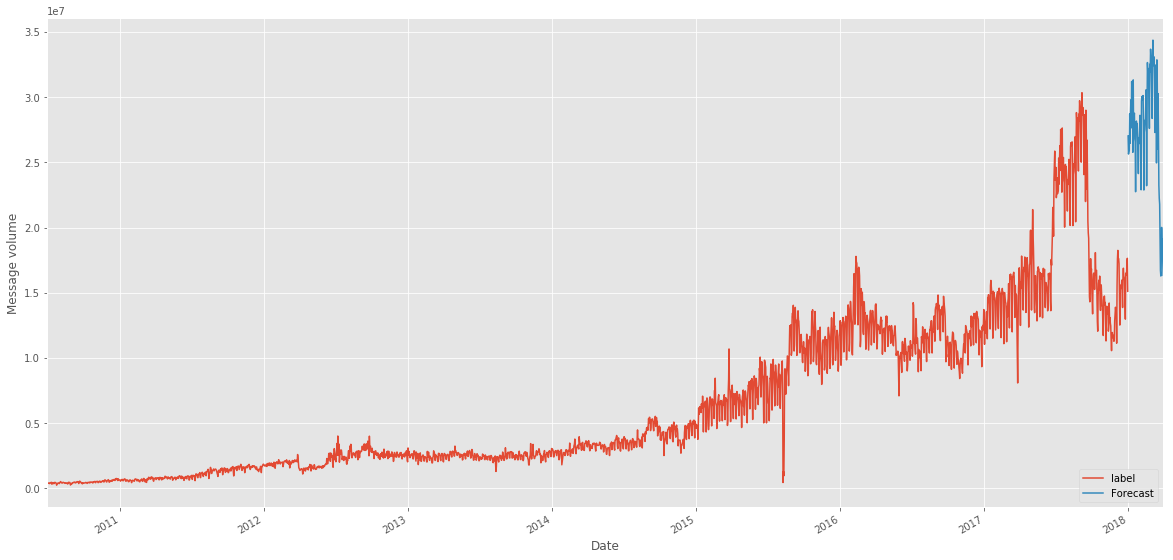

In [809]:
#df_copy[[label']].plot(x = "Date", y = "Messages forecast", kind= "line", figsize = (20,10))

df_copy['label'].plot(kind= "line", figsize = (20,10));
df_copy['Forecast'].plot(figsize = (20,10))
plt.xlabel("Date")
plt.ylabel("Message volume")
plt.legend(loc=4)
plt.show();

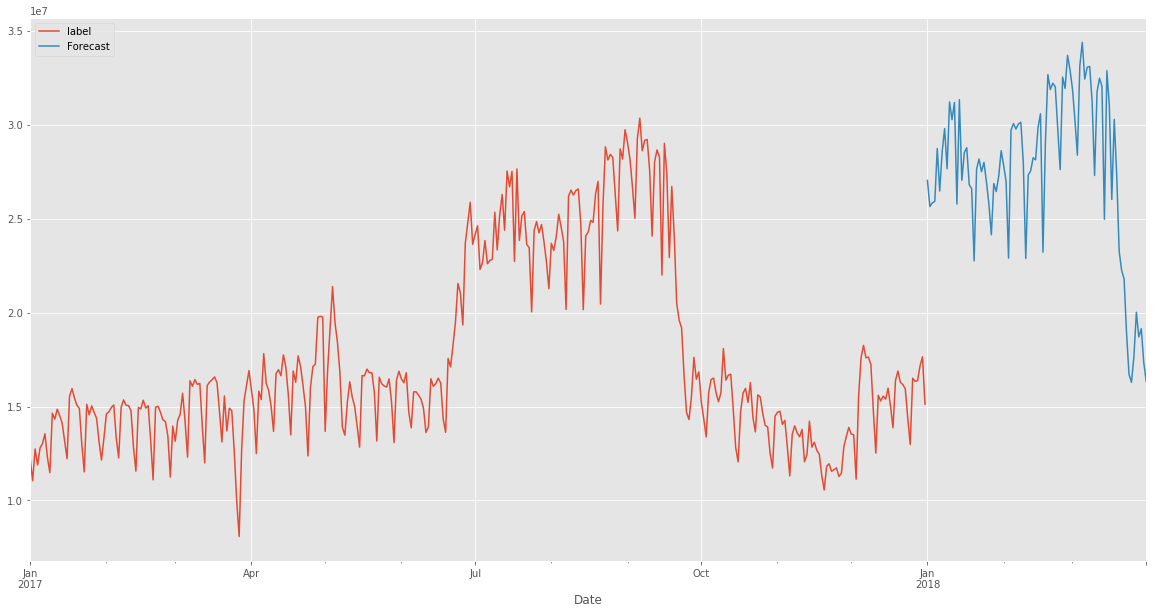

In [810]:
# Mentioning the dat range also
df_copy.loc['2017-01-01': '2018-06-01',['label', 'Forecast']].plot(kind= "line", figsize = (20,10))
# df_copy.loc['2018-03-21': '2018-05-01',['Forecast']].plot(figsize = (20,10));
#plt.xlim('2018-03-22', '2018-05-01')